In [69]:
import psycopg2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
conn = psycopg2.connect(database="piscineds",
                        user='mpellegr', password='mysecretpassword', 
                        host='localhost', port='5432'
)
cursor = conn.cursor()

In [70]:
cursor.execute("""WITH stats AS(
                        SELECT user_id,
                            SUM(price) as tot_amount,
                            COUNT(*) as n_of_purchases
                        FROM customers
                        WHERE event_type='purchase'
                        GROUP BY user_id)
                    SELECT n_of_purchases, tot_amount
                    FROM stats
                """)
res = cursor.fetchall()
X = np.array(res)

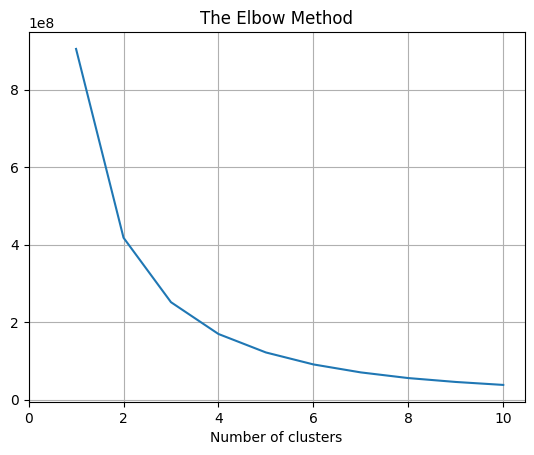

In [71]:
inertias = []
for k in range(1, 11):
    km = KMeans(n_clusters = k, random_state=0, n_init='auto').fit(X)
    inertias.append(km.inertia_)
plt.plot(range(1, 11), inertias)
plt.xlabel('Number of clusters')
plt.title('The Elbow Method')
plt.xticks(range(0, 12, 2))
plt.grid()
plt.show()

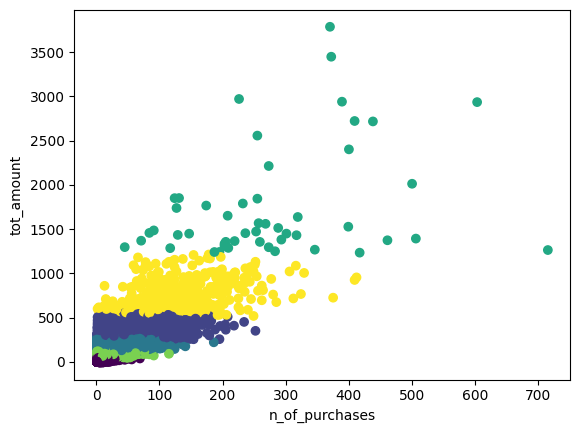

In [73]:
km = KMeans(6, random_state=22, n_init='auto').fit(X)
# print(km.labels_)
tot_amount = [amounts[1] for amounts in res]
n_of_purchases = [n[0] for n in res]
plt.scatter(n_of_purchases, tot_amount, c=km.labels_)
plt.xlabel('n_of_purchases')
plt.ylabel('tot_amount')
plt.show()